<a href="https://colab.research.google.com/github/NanThanThanSoe/OfflineHandwrittenRecognition/blob/master/RM_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**"Handwritten Character Recognition Using
Deep-Learning"**

Proceedings of the 2nd International Conference on Inventive Communication and Computational Technologies (ICICCT 2018)
IEEE Xplore Compliant - Part Number: CFP18BAC-ART; ISBN:978-1-5386-1974-2


**Use**
- NIST dataset
- Convolutional Neural Network Model
- OpenCV, Tensorflow, Python

**Backend system** 
- pre-trained neural network model to serve predictions
- performing image processing operations on the image of handwritten text which is to be recognized
- Neural network model trained using Tensorflow and a python script which is equipped with OpenCV library

A **CNN** comprises of a stack of Convolutional layer and a Max-pooling layer followed by a fully connected layer. 
- The convolutional layer is the most important layer of network. It performs the convolution operation. 
- The pooling layer comes after the convolutional layer. This layer is needed because in case of larger images, the number of trainable parameters can be very large. The pooling layer is used to reduce the size of image. Reducing the size of images decreases the overall time taken to train the neural network model.


 **Various image processing operations** which are performed on the image to be recognized

 1) Pre-processing: In this step the noise from the image is removed by using median filtering.

 2) Conversion to Gray-Scale: It is necessary to convert the image into
grayscale because working on grayscale images reduces the overall complexity of the system.

3) Thresholding:  Thresholding can seperate the handwritten text from its background.

4) Image Segmentation: The thresholded image is first segmented into individual lines, then words, then characters.


In [1]:
!pip install kaggle

In [0]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/RMProject(OCR)/Colab files(ipynb)/kaggle"

In [3]:
cd "/content/drive/My Drive/RMProject(OCR)/Colab files(ipynb)/kaggle"

/content/drive/My Drive/RMProject(OCR)/Colab files(ipynb)/kaggle


In [4]:
pwd

'/content/drive/My Drive/RMProject(OCR)/Colab files(ipynb)/kaggle'

In [5]:
!kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format

 99% 182M/185M [00:01<00:00, 114MB/s]
100% 185M/185M [00:01<00:00, 101MB/s]


In [6]:
!ls

 az-handwritten-alphabets-in-csv-format.zip  'A_Z Handwritten Data.csv'
'A_Z Handwritten Data'			      kaggle.json


In [7]:
!unzip \*.zip  && rm *.zip

Archive:  az-handwritten-alphabets-in-csv-format.zip
replace A_Z Handwritten Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
!ls

In [9]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [10]:
data = pd.read_csv("A_Z Handwritten Data.csv").astype('float32')
data.rename(columns={'0':'label'}, inplace=True)
print(data.shape)

(372450, 785)


In [0]:
# Splite data X data , and y the perdict label
X = data.drop('label',axis = 1)
Y = data['label']

In [12]:
print("shape:",X.shape)
print("culoms count:",len(X.iloc[1]))
print("784 = 28X28")

X.head()

shape: (372450, 784)
culoms count: 784
784 = 28X28


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


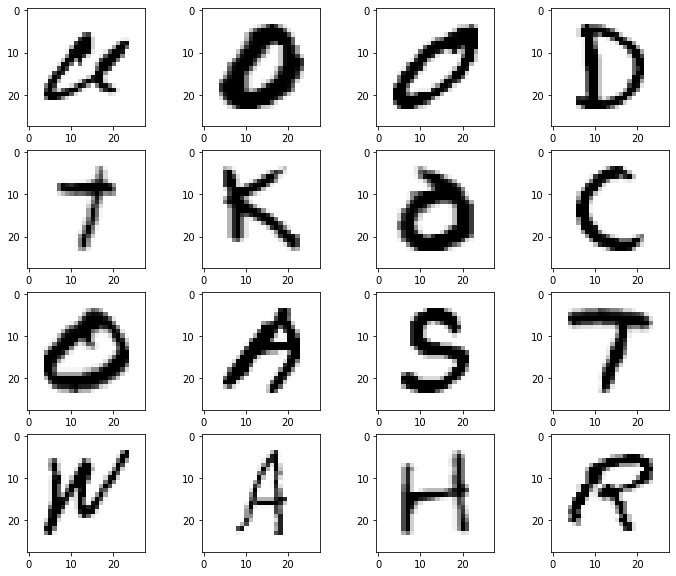

In [13]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X)
plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [0]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y)

In [0]:
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [17]:
print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))

Train: X=(186225, 28, 28, 1), y=(186225, 26)
Test: X=(186225, 28, 28, 1), y=(186225, 26)


In [45]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(16, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5,5), input_shape=(14,14,1)))
model.add(Conv2D(16, (5,5), input_shape=(10,10,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))


model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 20, 20, 16)        12816     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 6, 6, 16)          6416      
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 2, 2, 16)          6416      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 1, 1, 16)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 1, 16)        

In [47]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=3, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test,Y_test, verbose=0)
print("CNN Score:",scores[1])

Train on 279337 samples, validate on 93113 samples
Epoch 1/3
 - 598s - loss: 0.2048 - accuracy: 0.9407 - val_loss: 0.0927 - val_accuracy: 0.9734
Epoch 2/3
 - 603s - loss: 0.1393 - accuracy: 0.9598 - val_loss: 0.0782 - val_accuracy: 0.9771
Epoch 3/3
 - 606s - loss: 0.1208 - accuracy: 0.9656 - val_loss: 0.0808 - val_accuracy: 0.9775
CNN Score: 0.9775111675262451


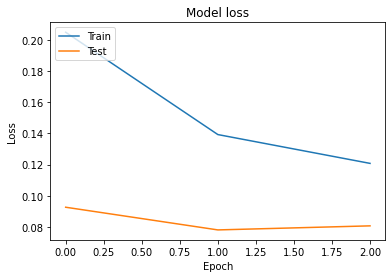

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()